##**Image Captioning EDA**##
Understanding the Fliker8 dataset

##**Loading dependencies and the dataset**

In [1]:
%tensorflow_version 2.x
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Read the Images to Keras/datasets
import tensorflow as tf
file_url = 'file:///content/drive/My Drive/Flickr8k_Dataset.zip'
zip_dir = tf.keras.utils.get_file('Flickr8k_Dataset.zip', origin=file_url, extract=True)
print(zip_dir)

# Read the Text files
file_url = 'file:///content/drive/My Drive/Flickr8k_text.zip'
txt_dir = tf.keras.utils.get_file('Flickr8k_text.zip', origin=file_url, extract=True)
print(txt_dir)

/root/.keras/datasets/Flickr8k_Dataset.zip
2342912/2340801 [==============================] - 0s 0us/step
/root/.keras/datasets/Flickr8k_text.zip


In [12]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import string
import os
from PIL import Image
import glob
from os import listdir
import tensorflow as tf
from collections import Counter 
import seaborn as sns
import sys, os, warnings 
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

root_directory = '/root/.keras/datasets/'

## The location of the Flickr8K_ photos
image_dir = root_directory + 'Flicker8k_Dataset/'

# Create a list of all image names in the directory
img = glob.glob(image_dir + '*.jpg')

# load descriptions
descriptions_dir = root_directory + 'Flickr8k.token.txt'

##**Making a dataframe out of raw text**##

In [46]:
def make_dataset(text):
  df = []
  for sentences in text.split('\n'):
      splitted = sentences.split('\t')
      if len(splitted) == 1:
          continue
      w = splitted[0].split("#")
      df.append(w + [splitted[1].lower()])
  return df

doc = load_doc(descriptions_dir)  
#text = load_doc(descriptions_dir)
df = make_dataset(doc)
df[:5]  

data = pd.DataFrame(df,columns=["filename","index","caption"])
# Reordering columns for better readability
data = data.reindex(columns =['index','filename','caption'])
data['length'] = data['caption'].str.split(" ").str.len()
data

,index,filename,caption,length
0,0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...,18
1,1,1000268201_693b08cb0e.jpg,a girl going into a wooden building .,8
2,2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse .,9
3,3,1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playh...,10
4,4,1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a woo...,13
...,...,...,...,...
40455,0,997722733_0cb5439472.jpg,a man in a pink shirt climbs a rock face,10
40456,1,997722733_0cb5439472.jpg,a man is rock climbing high in the air .,10
40457,2,997722733_0cb5439472.jpg,a person in a red shirt climbing up a rock fac...,16
40458,3,997722733_0cb5439472.jpg,a rock climber in a red shirt .,8


###**Remove any invalid file names**###

In [10]:
# If any filename dosn't have .jpg extension at last then mark it as Invalid filename
def invalid_filename_check(data):
  for filenames in data["filename"]:
    found = re.search("(.(jpg)$)", filenames)
    if (found):
        pass
    else:
        print("Error file: {}".format(filenames))   

data[data['filename'] == "2258277193_586949ec62.jpg.1"]  

,index,filename,caption
6730,0,2258277193_586949ec62.jpg.1,people waiting for the subway
6731,1,2258277193_586949ec62.jpg.1,some people looking out windows in a large bui...
6732,2,2258277193_586949ec62.jpg.1,three people are waiting on a train platform .
6733,3,2258277193_586949ec62.jpg.1,three people standing at a station .
6734,4,2258277193_586949ec62.jpg.1,two woman and one man standing near train trac...


In [0]:
# We must remove this error file from out dataset
data = data[data['filename'] != '2258277193_586949ec62.jpg.1']
data.shape

invalid_filename_check(data) 

###**Individual file information**

In [14]:
def utility_counter(data):

  unique_filenames = np.unique(data.filename.values)
  print("The number of unique file names : {}".format(len(unique_filenames)))

  ct_dict = Counter(data.filename.values)
  print("We can see that all the keys are having values count = 5")
  print(ct_dict)

  print("The distribution of the number of captions for each image:")
  ct = Counter(Counter(data.filename.values).values())
  print(ct)
  return unique_filenames

unique_filenames = utility_counter(data) 

The number of unique file names : 8091
We can see that all the keys are having values count = 5
Counter({'1000268201_693b08cb0e.jpg': 5, '1001773457_577c3a7d70.jpg': 5, '1002674143_1b742ab4b8.jpg': 5, '1003163366_44323f5815.jpg': 5, '1007129816_e794419615.jpg': 5, '1007320043_627395c3d8.jpg': 5, '1009434119_febe49276a.jpg': 5, '1012212859_01547e3f17.jpg': 5, '1015118661_980735411b.jpg': 5, '1015584366_dfcec3c85a.jpg': 5, '101654506_8eb26cfb60.jpg': 5, '101669240_b2d3e7f17b.jpg': 5, '1016887272_03199f49c4.jpg': 5, '1019077836_6fc9b15408.jpg': 5, '1019604187_d087bf9a5f.jpg': 5, '1020651753_06077ec457.jpg': 5, '1022454332_6af2c1449a.jpg': 5, '1022454428_b6b660a67b.jpg': 5, '1022975728_75515238d8.jpg': 5, '102351840_323e3de834.jpg': 5, '1024138940_f1fefbdce1.jpg': 5, '102455176_5f8ead62d5.jpg': 5, '1026685415_0431cbf574.jpg': 5, '1028205764_7e8df9a2ea.jpg': 5, '1030985833_b0902ea560.jpg': 5, '103106960_e8a41d64f8.jpg': 5, '103195344_5d2dc613a3.jpg': 5, '103205630_682ca7285b.jpg': 5, '10321

###**Load caption dictionary**
Read in the text and split out the filename and description separately. This goes into a dictionary where the key is the filename and the 5 desciptions are added as the item.

In [21]:
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# extract filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping

# parse descriptions
descriptions = load_descriptions(doc)
descriptions_b4_clean = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

Loaded: 8092 


###**Clean the text by:**
- Removing punctuation
- making everything lower case
- remove hanging 's' and 'a'
- remove numbers

In [0]:
def clean_descriptions(descriptions):
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for key, desc_list in descriptions.items():
		for i in range(len(desc_list)):
			desc = desc_list[i]
			# tokenize
			desc = desc.split()
			# convert to lower case
			desc = [word.lower() for word in desc]
			# remove punctuation from each token
			desc = [w.translate(table) for w in desc]
			# remove hanging 's' and 'a'
			desc = [word for word in desc if len(word)>1]
			# remove tokens with numbers in them
			desc = [word for word in desc if word.isalpha()]
			# store as string
			desc_list[i] =  ' '.join(desc)

# clean descriptions
clean_descriptions(descriptions)

In [29]:
pd.DataFrame(descriptions)

,1000268201_693b08cb0e,1001773457_577c3a7d70,1002674143_1b742ab4b8,1003163366_44323f5815,1007129816_e794419615,1007320043_627395c3d8,1009434119_febe49276a,1012212859_01547e3f17,1015118661_980735411b,1015584366_dfcec3c85a,101654506_8eb26cfb60,101669240_b2d3e7f17b,1016887272_03199f49c4,1019077836_6fc9b15408,1019604187_d087bf9a5f,1020651753_06077ec457,1022454332_6af2c1449a,1022454428_b6b660a67b,1022975728_75515238d8,102351840_323e3de834,1024138940_f1fefbdce1,102455176_5f8ead62d5,1026685415_0431cbf574,1028205764_7e8df9a2ea,1030985833_b0902ea560,103106960_e8a41d64f8,103195344_5d2dc613a3,103205630_682ca7285b,1032122270_ea6f0beedb,1032460886_4a598ed535,1034276567_49bb87c51c,104136873_5b5d41be75,1042020065_fb3d3ba5ba,1042590306_95dea0916c,1045521051_108ebc19be,1048710776_bb5b0a5c7c,1052358063_eae6744153,105342180_4d4a40b47f,1053804096_ad278b25f1,1055623002_8195a43714,...,95734038_2ab5783da7,957682378_46c3b07bcd,95783195_e1ba3f57ca,958326692_6210150354,961189263_0990f3bcb5,961611340_251081fcb8,963730324_0638534227,96399948_b86c61bfe6,964197865_0133acaeb4,96420612_feb18fc6c6,965444691_fe7e85bf0e,967719295_3257695095,968081289_cdba83ce2e,96973080_783e375945,96978713_775d66a18d,96985174_31d4c6f06d,970641406_9a20ee636a,97105139_fae46fe8ef,972381743_5677b420ab,973827791_467d83986e,97406261_5eea044056,974924582_10bed89b8d,975131015_9acd25db9c,97577988_65e2eae14a,976392326_082dafc3c5,97731718_eb7ba71fd3,977856234_0d9caee7b2,978580450_e862715aba,979201222_75b6456d34,979383193_0a542a059d,98377566_e4674d1ebd,985067019_705fe4a4cc,987907964_5a06a63609,989754491_7e53fb4586,989851184_9ef368e520,990890291_afc72be141,99171998_7cc800ceef,99679241_adc853a5c0,997338199_7343367d7f,997722733_0cb5439472
0,child in pink dress is climbing up set of stai...,black dog and spotted dog are fighting,little girl covered in paint sits in front of ...,man lays on bench while his dog sits by him,man in an orange hat starring at something,child playing on rope net,black and white dog is running in grassy garde...,dog shakes its head near the shore red ball ne...,boy smiles in front of stony wall in city,black dog leaps over log,brown and white dog is running through the snow,man in hat is displaying pictures next to skie...,collage of one person climbing cliff,brown dog chases the water from sprinkler on lawn,dog prepares to catch thrown object in field w...,black and white dog jumping in the air to get toy,child and woman are at waters edge in big city,couple and an infant being held by the male si...,black dog running in the surf,man drilling hole in the ice,two different breeds of brown and white dogs p...,man uses ice picks and crampons to scale ice,black dog carries green toy in his mouth as he...,man and baby are in yellow kayak on water,black dog and brown dog are jumping up to catc...,boy with stick kneeling in front of goalie net,man in black is sitting next to modern art str...,tent is being set up on the ice,woman crouches near three dogs in field,man is standing in front of skyscraper,boy bites hard into treat while he sits outside,people sit on the mountainside and check out t...,boy in green shirt is looking down at many inf...,man and woman pose for the camera while anothe...,person eats takeout while watching small telev...,couple of several people sitting on ledge over...,boy takes jump on his skateboard while another...,girl paddling down large river as seen from be...,girl in pigtails splashes in the shallow water,group of four children wearing pajamas have pi...,...,man on bike nest to river,brown dog and black dog run into each other in...,hiker navigates rope and wood bridge over larg...,large tent with green cover at campground,child is playing in the muddy water running al...,girl in tutu and boy in costume in dancefloor,kid is pushing shopping cart behind an adult i...,giant inflatable ball taller than man is chase...,baby is trying to eat large red plastic toy ou...,man in red swim trunks is jumping onto bodyboard,closeup of man holding baby w

###**Analysis of words and word sequences**###

In [0]:
# Adapted from:
# https://fairyonice.github.io/Develop_an_image_captioning_deep_learning_model_using_Flickr_8K_data.html

# visualize distribution of the words
def df_word(df_txt):
    df_desc = pd.DataFrame.from_dict(df_txt, orient='index', columns=['Cap1', 'Cap2', 'Cap3', 'Cap4', 'Cap5']).reset_index()
    df_desc = pd.melt(df_desc, id_vars='index', var_name='key', value_name='value')
    df_desc.rename(columns={'index':'filename', 'value':'caption'}, inplace=True)
    df_desc = df_desc.reset_index().drop(columns=['key'])

    df_vocabulary = []
    for txt in df_desc.caption.values:
        df_vocabulary.extend(txt.split())
    print('Vocabulary Size: %d' % len(set(df_vocabulary)))

    ct = Counter(df_vocabulary)

    #can't get this next line to work
    #dfword = pd.DataFrame({"word":ct.keys(),"count":ct.values()})

    #alternative - create word & count dataframes, then merge into one
    key = pd.DataFrame(ct.keys()).reset_index().rename(columns={0:'word'})
    value = pd.DataFrame(ct.values()).reset_index().rename(columns={0:'count'})

    dfword = key.merge(value, on='index', how='inner')
    dfword = dfword.sort_values('count',ascending=False).reset_index()

    return dfword

#------------------------------------------------
# most and least frequently appearing words
import seaborn as sns
def plthist(dfsub, title="The top 50 most frequently appearing words"):
    sns.set(style='whitegrid')
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    sns.barplot(dfsub.word,dfsub["count"])
    plt.yticks(fontsize=16)
    plt.xticks(rotation=90,fontsize=16)  #dfsub.index,dfsub["word"],
    plt.title(title,fontsize=16)
    plt.show()


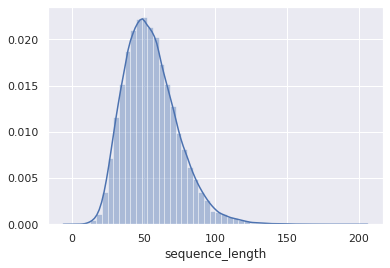

In [15]:
df=pd.DataFrame()
df["sequence_length"] = data["caption"].apply(len)

sns.set()
distribution = sns.distplot(df["sequence_length"])

###**Visually show Top 50 Most & Least used words**###

Vocabulary Size: 9630


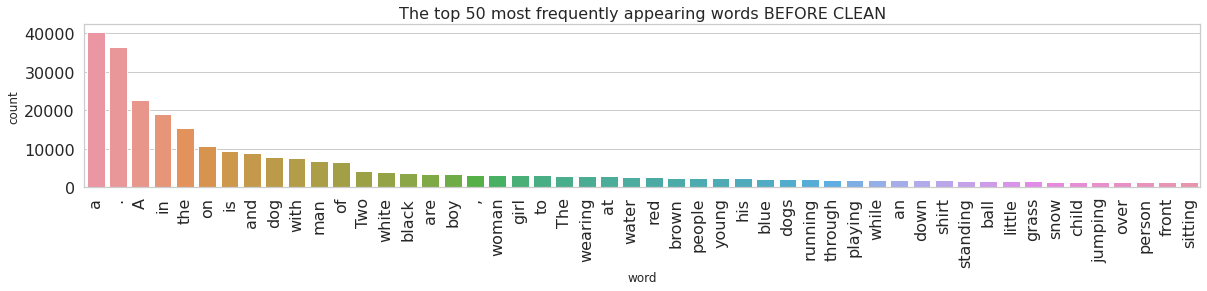

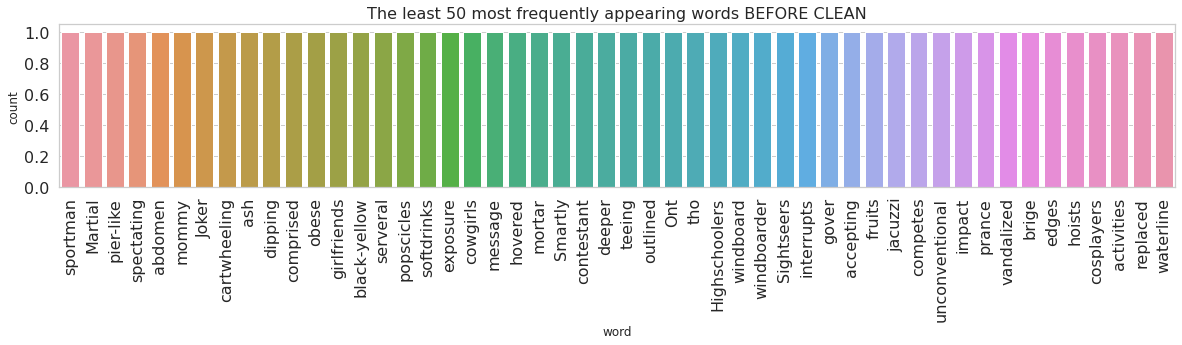

In [23]:
# BEFORE CLEAN

# visualize distribution of the words
dfword = df_word(descriptions_b4_clean)

topn = 50

# most and least frequently appearing words
plthist(dfword.iloc[:topn,:],  title="The top 50 most frequently appearing words BEFORE CLEAN")

plthist(dfword.iloc[-topn:,:], title="The least 50 most frequently appearing words BEFORE CLEAN")

###**Top 50 Most & Least used words AFTER CLEAN**###

Vocabulary Size: 8763


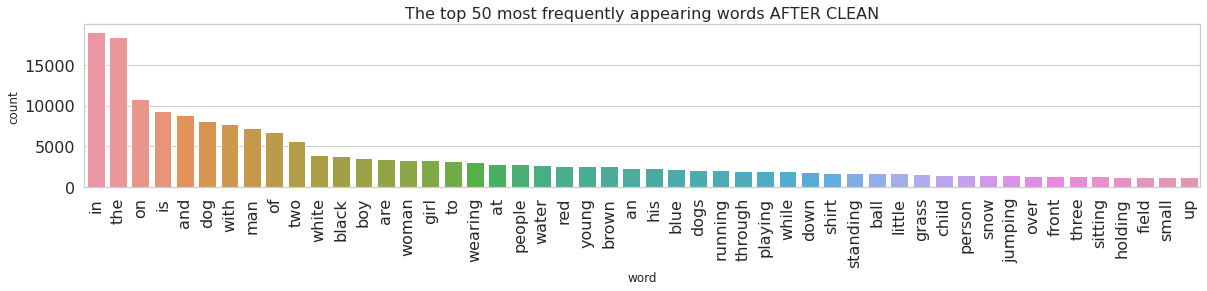

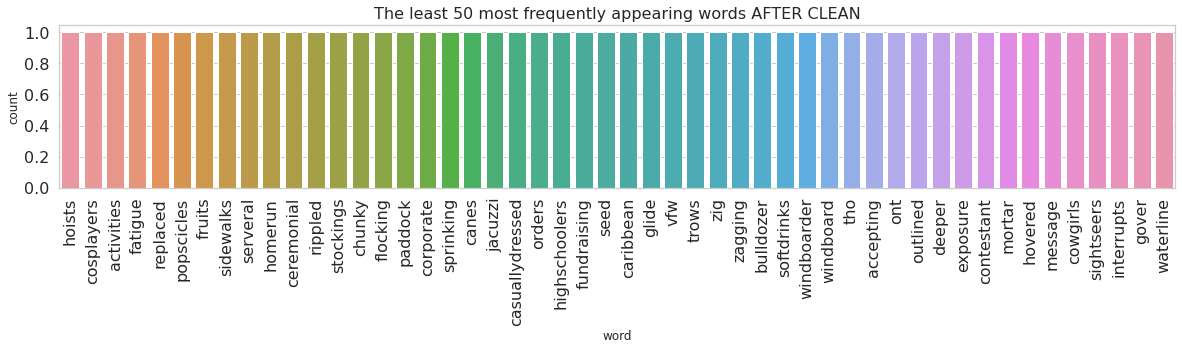

In [24]:
# AFTER CLEAN

# visualize distribution of the words
df_desc_word = df_word(descriptions)

topn = 50

# most and least frequently appearing words
plthist(df_desc_word.iloc[:topn,:],  title="The top 50 most frequently appearing words AFTER CLEAN")

plthist(df_desc_word.iloc[-topn:,:], title="The least 50 most frequently appearing words AFTER CLEAN")

**Distribution of lease frequent words** with a frequency of less than 1
Avg sequence length of train captions…

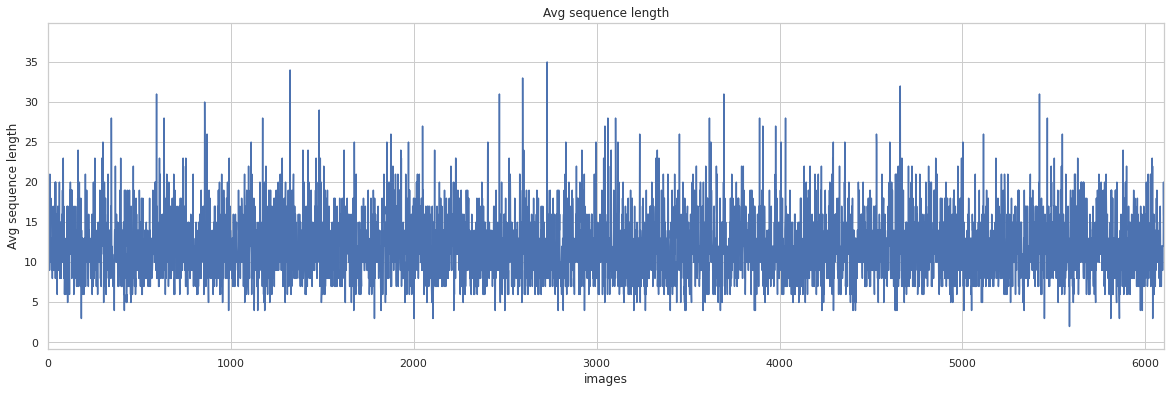

In [51]:
data["length"].plot(figsize=(20,6),grid=True,xlim=(0,6100))
plt.title('Avg sequence length')
plt.ylabel('Avg sequence length')
plt.xlabel('images')
plt.show()

###**Display some images alongside their captions**###

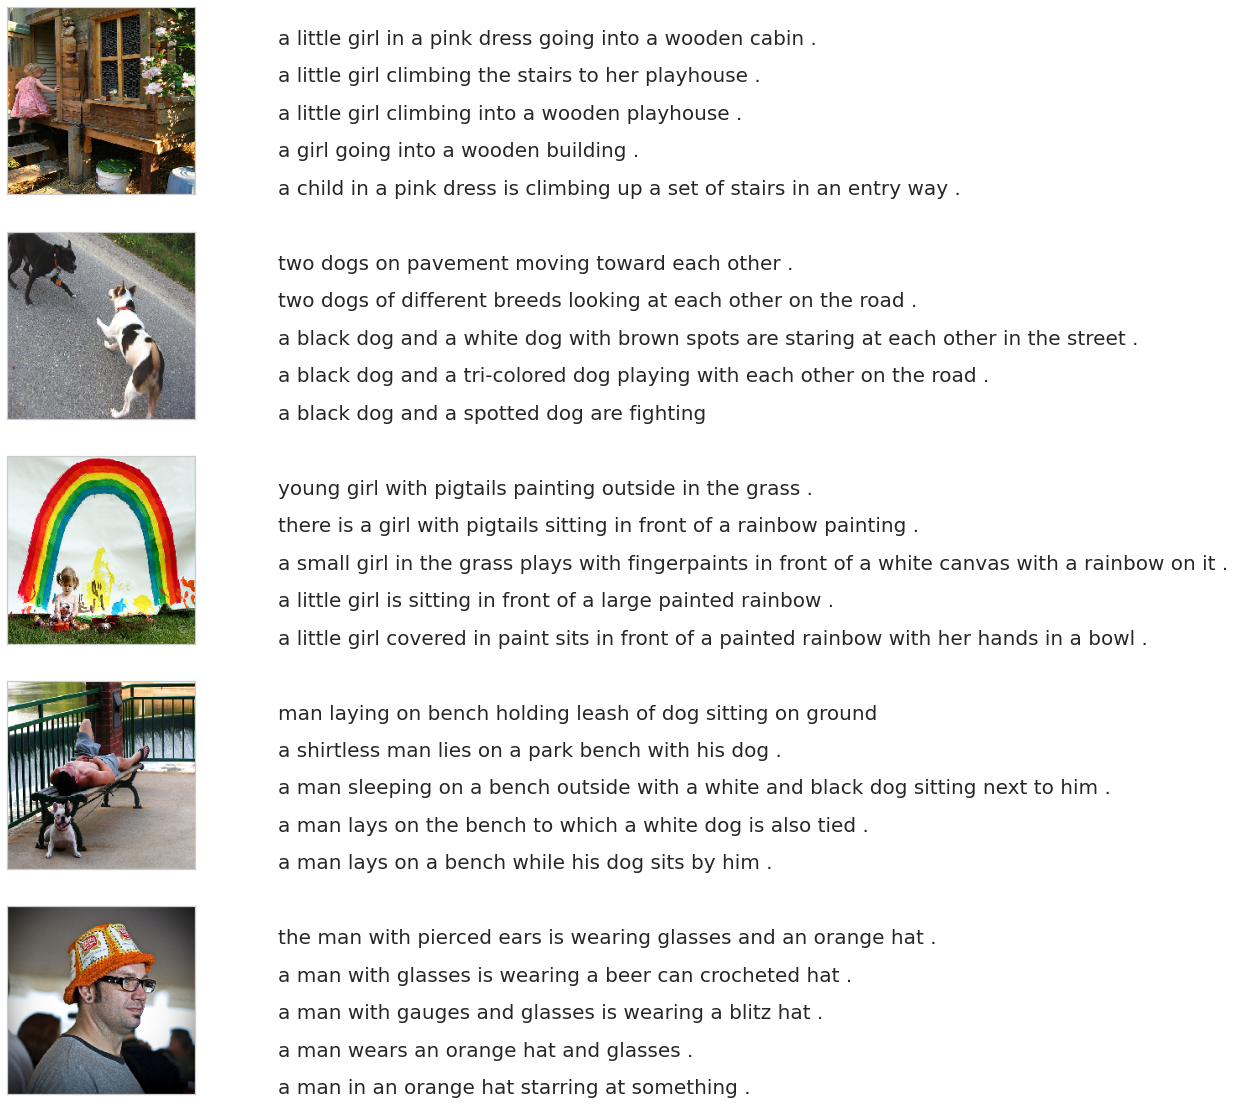

In [27]:
# Display some images with their captions
# Adapted from: https://fairyonice.github.io/Develop_an_image_captioning_deep_learning_model_using_Flickr_8K_data.html
from keras.preprocessing.image import load_img, img_to_array

def plot_image_caption(uni_filenames, data, npic=5, npix=224):
    target_size = (npix,npix,3)

    count = 1
    fig = plt.figure(figsize=(10,20))
    for jpgfnm in uni_filenames[:npic]:
        filename = image_dir + jpgfnm 
        captions = list(data["caption"].loc[data["filename"]==jpgfnm].values)
        image_load = load_img(filename, target_size=target_size)
        
        ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1
        
        ax = fig.add_subplot(npic,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(captions))
        for i, caption in enumerate(captions):
            # remove sequence swtart/end tags
            caption_text = re.sub('startseq ', '', caption)
            caption_text = re.sub(' endseq', '', caption_text)
            ax.text(0,i,caption,fontsize=20)
        count += 1
    plt.show()


#---------------------------------------------------
uni_filenames = np.unique(data['filename'])
npic = 5
npix = 224

plot_image_caption(uni_filenames, data, npic, npix,)